# Applied Machine Learning Project 1 - Group 14 - Rakshitha, Diana

# Classification Task

# Bank Marketing Data Set to predict if the client will subscribe a term deposit (variable y).



DATASET DESCRIPTION

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Input variables:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'primary','secondary','tertiary','unknown')
5 - default: has credit in default? (categorical: 'no','yes')
6 - balance:Balance of the individual (numeric)
7 - housing: has housing loan? (categorical: 'no','yes')
8 - loan: has personal loan? (categorical: 'no','yes')
9 - contact: contact communication type (categorical: 'cellular','telephone','unknown') 
10 - day: last contact date of the month (categorical: '01','02','03','04','05')
11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12 - duration: last contact duration, in seconds (numeric).
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')
17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

LINK TO DATASET: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

MinMaxScaler: Many machine learning algorithms work better when features are on a relatively similar scale. We have used MinMaxScaler as the type of scaling. 
MinMaxScaler preserves the shape of the original distribution. The default range for the feature returned by MinMaxScaler is 0 to 1 and the relative spaces between each feature’s values are maintained by MinMaxScaler.
Whereas in StandardScaler, the values are on a similar scale, but the range is larger than after MinMaxScaler. So, we are using MinMaxScaler as the default and since it’s non-distorting.

We have used confusion matrix as our evaluation strategy. Confusion matrix tells us about the accuracy of the model, precision, recall and from these we can calculate the misclassification rate, F-1 score and FPR. The higher the precision value that means less type1 error and the higher the recall value the better.

# Step 1 : Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from PIL import *
import graphviz
%matplotlib inline

## Step 2 : Preprocessing 

In [2]:
data= pd.read_csv('bank_marketing_dataset_classification.csv',encoding="ISO-8859-1")
data.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          41647 non-null float64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      41647 non-null float64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     41647 non-null float64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [4]:
data.isna().any()

age           True
job          False
marital      False
education    False
default      False
balance       True
housing      False
loan         False
contact      False
day          False
month        False
duration      True
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [5]:
#get the median of Age and replace it NaN
data['age'].fillna(data['age'].median(), inplace = True) 

In [6]:
#get the mean of duration and replace it NaN
data['duration'].fillna(data['duration'].mean(), inplace = True) 

In [7]:
#get the mean of balance and replace it NaN
data['balance'].fillna(data['balance'].mean(), inplace = True) 

In [8]:
#data cleanup
cleanup = {'default': {'yes': 1, 'no': 0}, #Encoding Yes as 1 and No as 0
           'y': {'yes' : 1, 'no': 0},
           'marital': {'single': 0, 'married': 1, 'divorced': 2},
           'education': {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3},
           'housing': {'yes': 1, 'no': 0},
           'loan' : {'yes': 1, 'no': 0},
            'contact' : {'unknown': 0, 'cellular': 1, 'telephone': 2},
          'poutcome' : {'unknown' : 0, 'success' : 1, 'failure' : 2, 'other' : 3}}
data.replace(cleanup, inplace = True)
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,1,3,0,2143.0,1,0,0,5,may,261.0,1,-1,0,0,0
1,44.0,technician,0,2,0,29.0,1,0,0,5,may,151.0,1,-1,0,0,0
2,33.0,entrepreneur,1,2,0,2.0,1,1,0,5,may,76.0,1,-1,0,0,0
3,47.0,blue-collar,1,0,0,1506.0,1,0,0,5,may,92.0,1,-1,0,0,0
4,33.0,unknown,0,0,0,1.0,0,0,0,5,may,198.0,1,-1,0,0,0


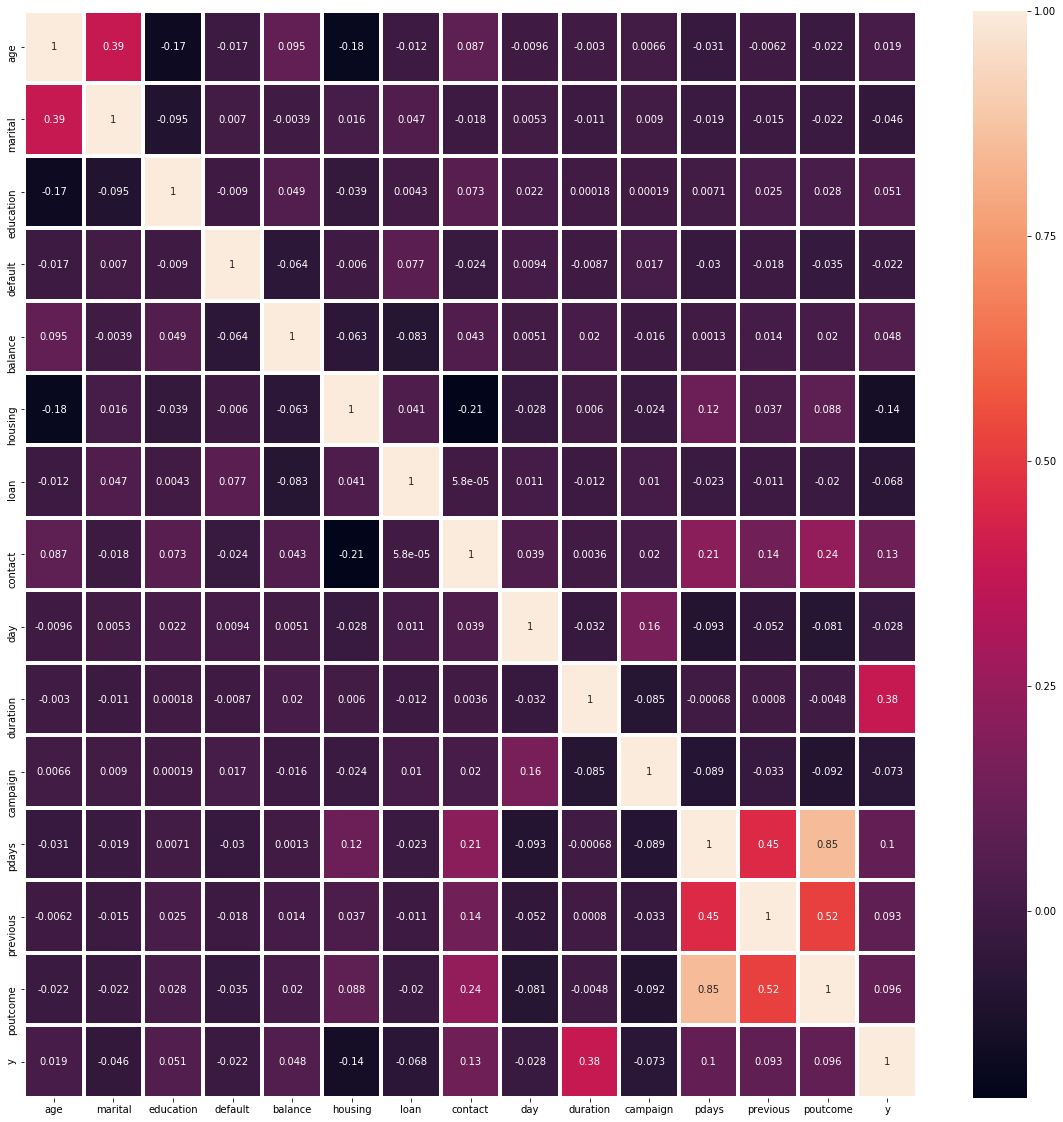

In [9]:
data_corr1= data.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(data_corr1,annot= True,linecolor='white',linewidths=3)

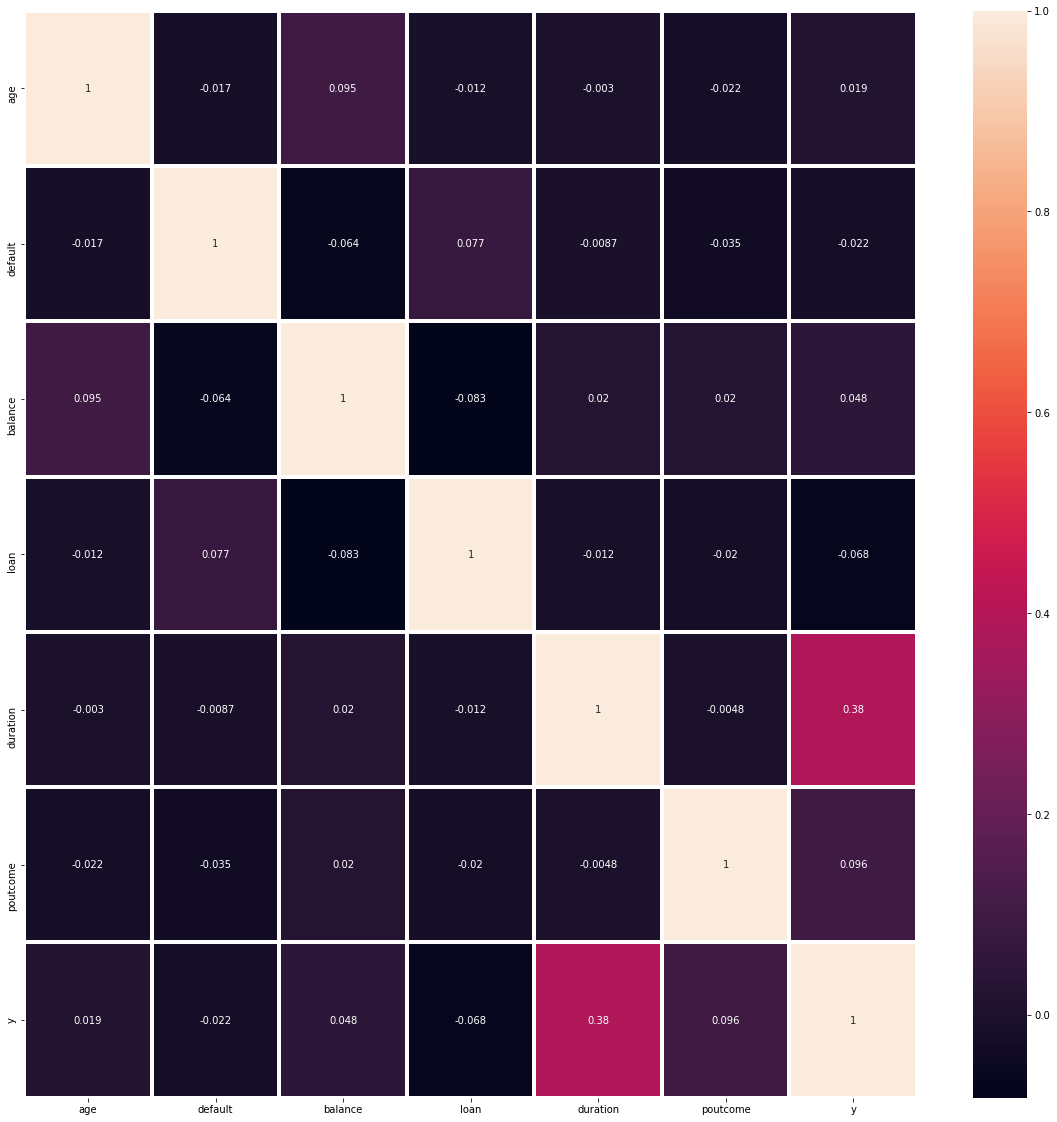

In [10]:
data.drop(['job','month','day','marital','housing','contact','education','campaign','pdays','previous'],axis=1,inplace=True)
data_corr1= data.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(data_corr1,annot= True,linecolor='white',linewidths=3)

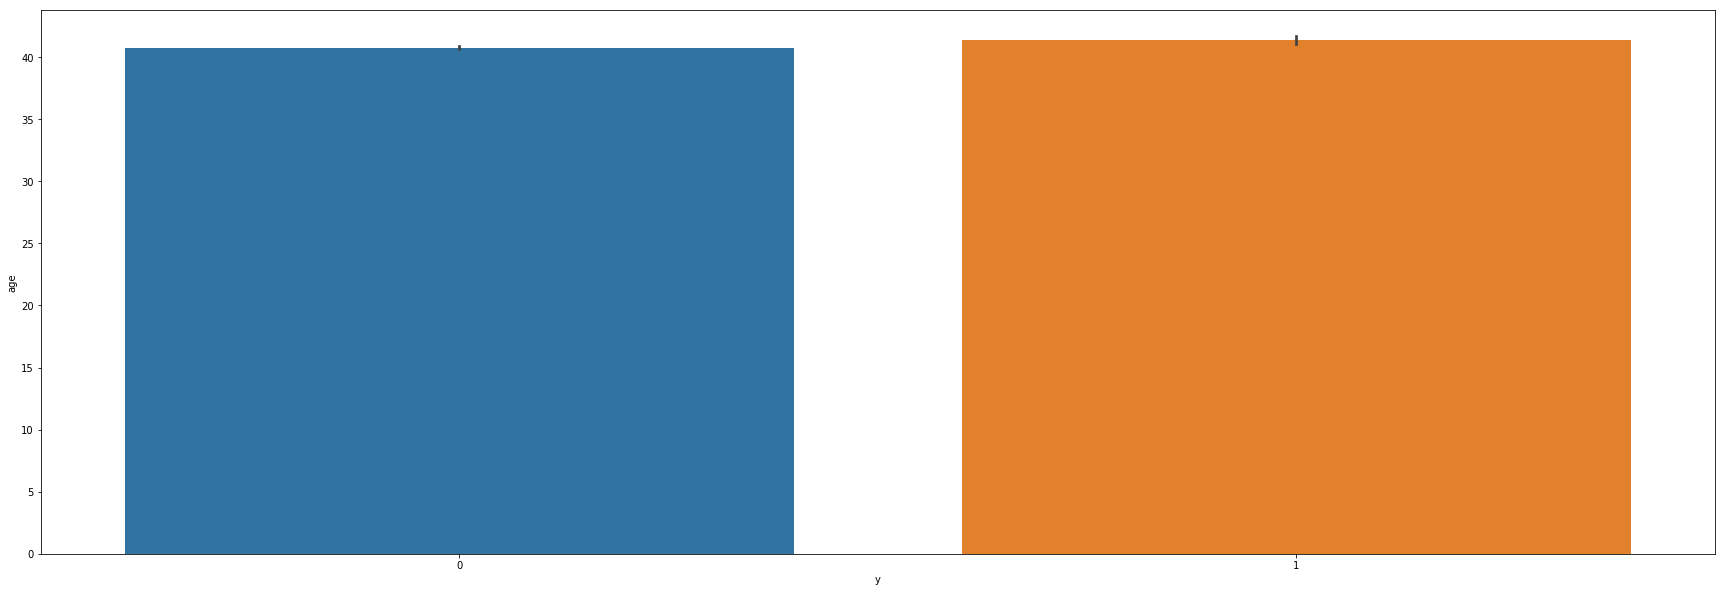

In [11]:
plt.figure(figsize=(30,10))
sns.barplot(x='y',y='age',data= data,estimator=np.mean)

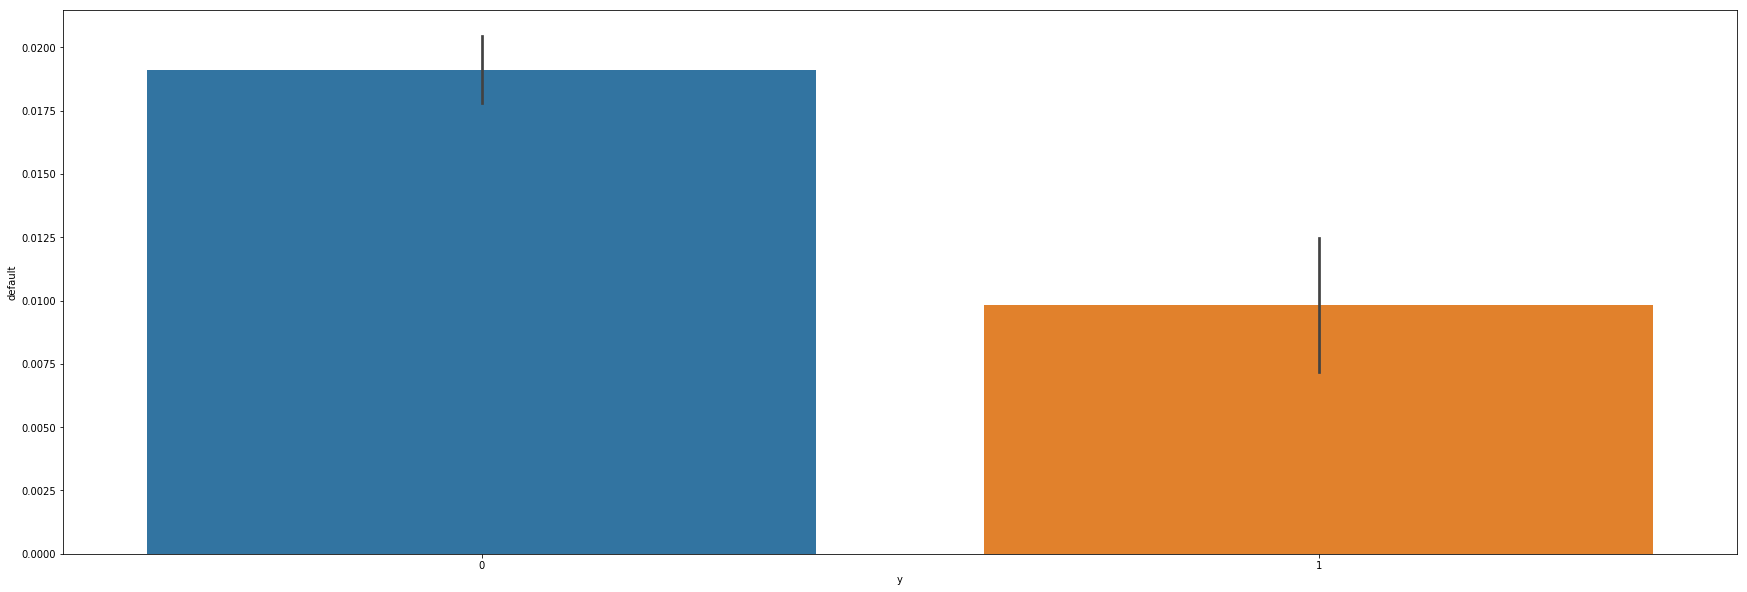

In [12]:
plt.figure(figsize=(30,10))
sns.barplot(x='y',y='default',data= data,estimator=np.mean)

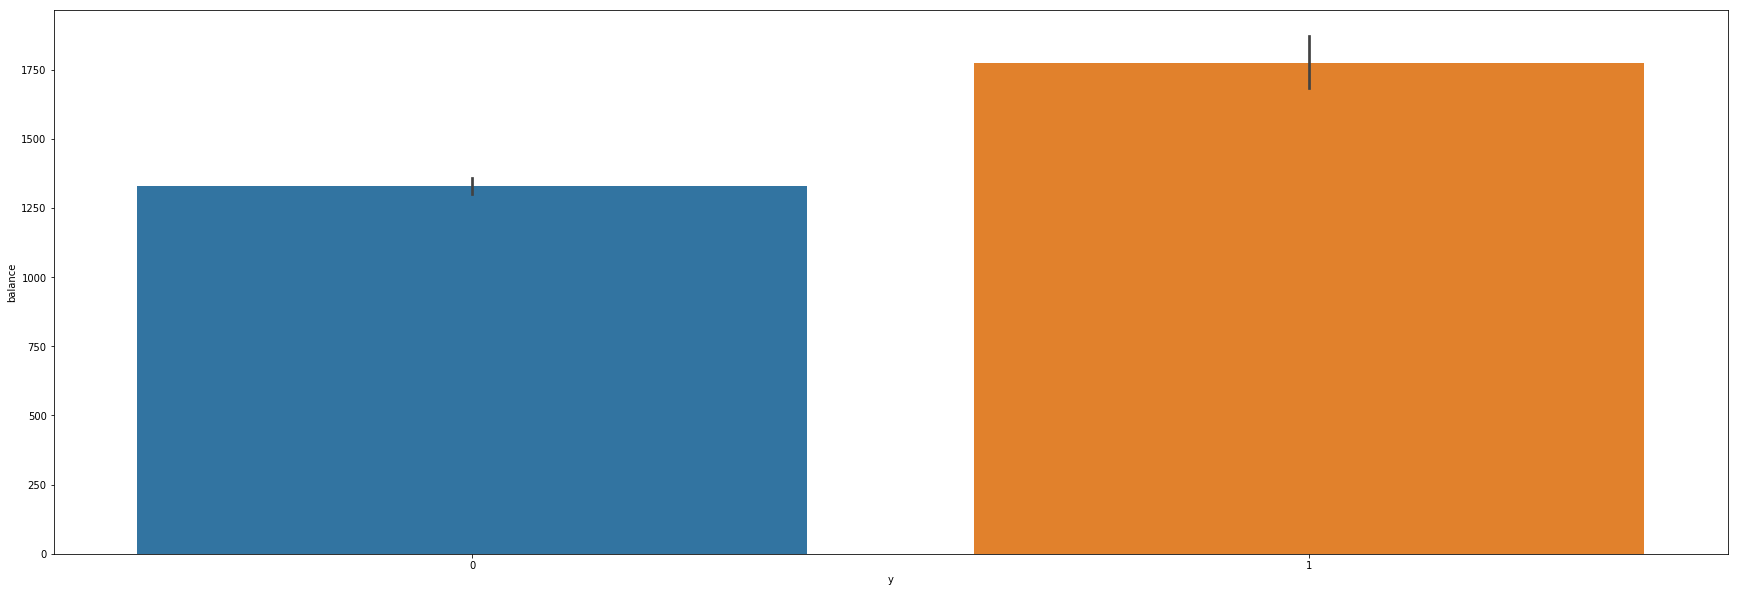

In [13]:
plt.figure(figsize=(30,10))
sns.barplot(x='y',y='balance',data= data,estimator=np.mean)

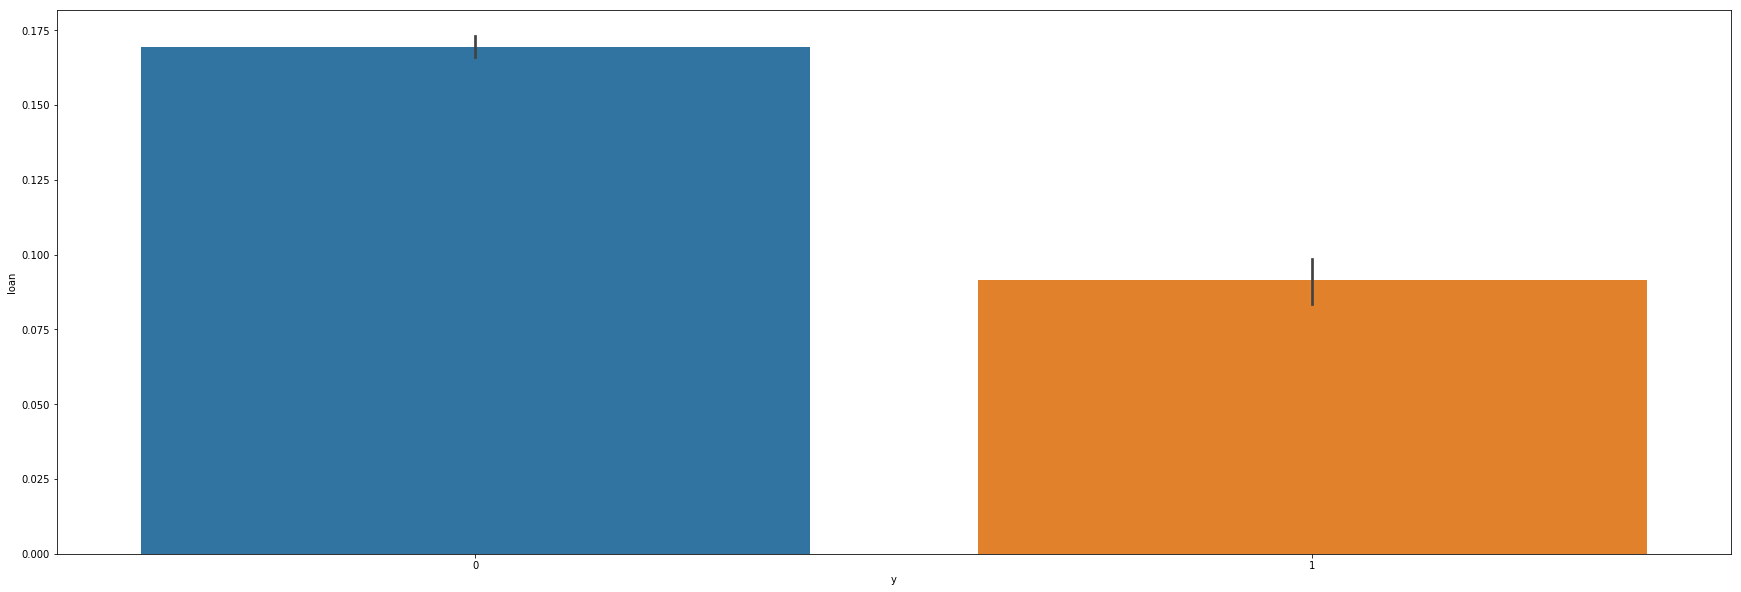

In [14]:
plt.figure(figsize=(30,10))
sns.barplot(x='y',y='loan',data= data,estimator=np.mean)

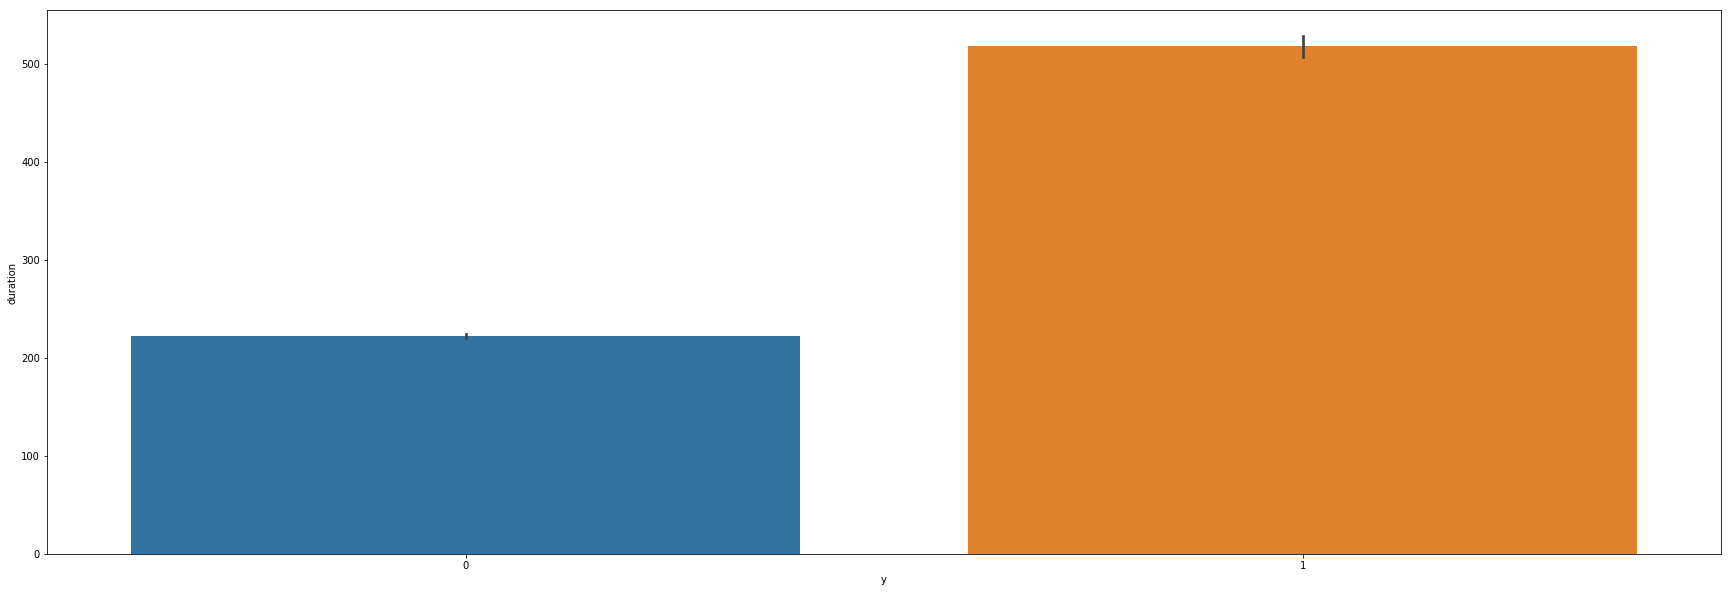

In [15]:
plt.figure(figsize=(30,10))
sns.barplot(x='y',y='duration',data= data,estimator=np.mean)

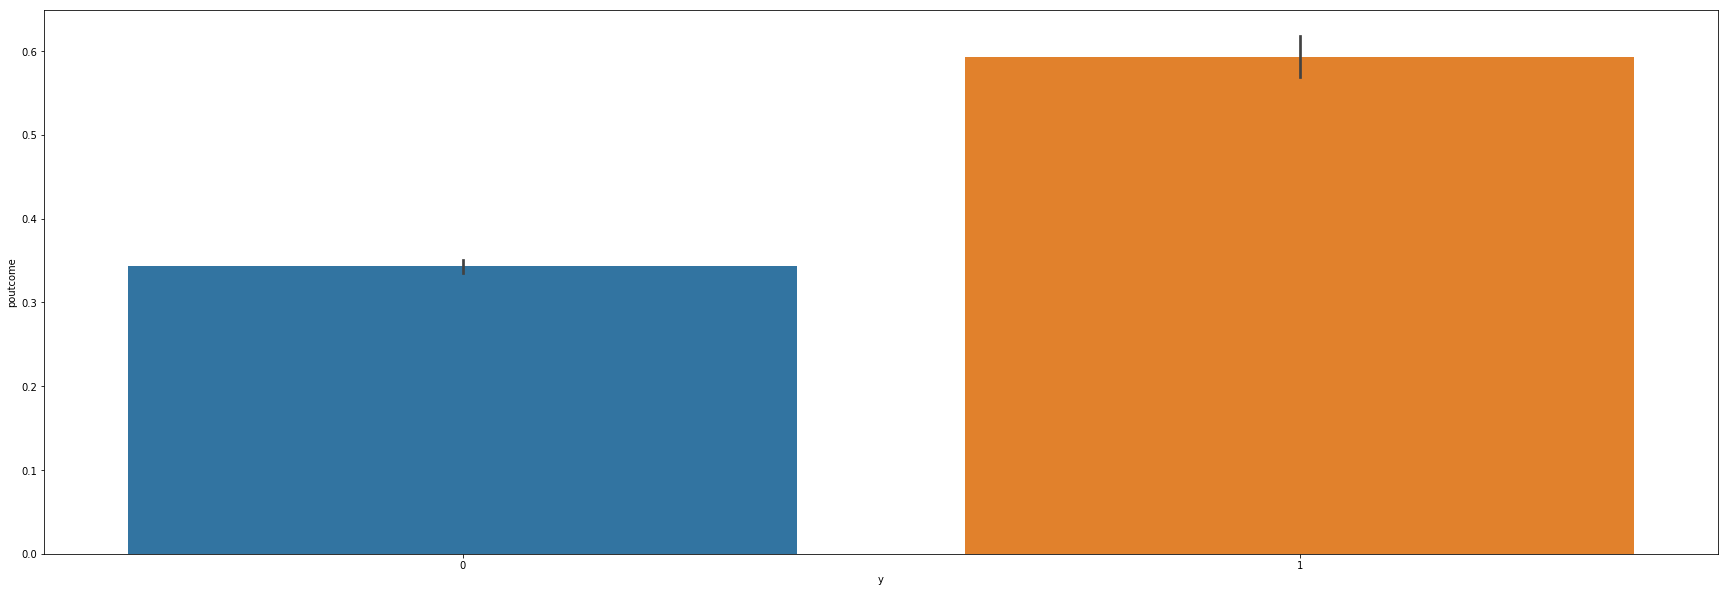

In [16]:
plt.figure(figsize=(30,10))
sns.barplot(x='y',y='poutcome',data= data,estimator=np.mean)

# Step 3 : Running various models

## 1. Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [18]:
x= data.drop('y',axis=1)
y=data['y']
x_train_org,x_test_org,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs')
    log_l1.fit(x_train, y_train)
    log_l2.fit(x_train, y_train)
    train_score_l1.append(log_l1.score(x_train, y_train))
    train_score_l2.append(log_l2.score(x_train, y_train))
    test_score_l1.append(log_l1.score(x_test, y_test))
    test_score_l2.append(log_l2.score(x_test, y_test))

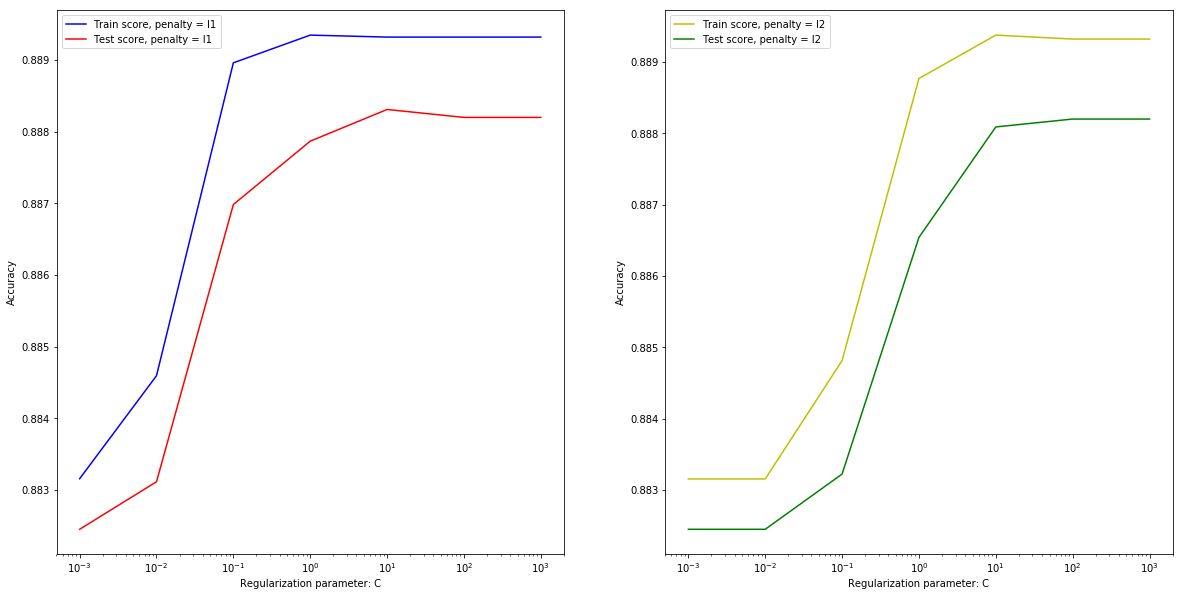

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1',c='blue')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1',c='r')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.subplot(1,2,2)
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2',c='y')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2',c='g')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

At C=1, L1 regularization technique has better accuracy. 
At C=10, L2 regularization technique has better accuracy. 

In [21]:
log_l1 = LogisticRegression(penalty = 'l1', C = 1)
log_l2 = LogisticRegression(penalty = 'l2', C = 10)

log_l1.fit(x_train,y_train)
log_l2.fit(x_train,y_train)

print("Penality: l1")
print("Train_score:{:.4f}".format(log_l1.score(x_train, y_train)))
print("Test_score:{:.4f}".format(log_l1.score(x_test, y_test)))

print("Penality: l2")
print("Train_score:{:.4f}".format(log_l2.score(x_train, y_train)))
print("Test_score:{:.4f}".format(log_l2.score(x_test, y_test)))

C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Penality: l1
Train_score:0.8893
Test_score:0.8879
Penality: l2
Train_score:0.8894
Test_score:0.8881


C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


L1 gives better accuracy

In [22]:
logreg = LogisticRegression(penalty='l1', solver = 'liblinear')
logreg.fit(x_train, y_train)
print('Train score: {:.4f}'.format(logreg.score(x_train, y_train)))
print('Test score: {:.4f}'.format(logreg.score(x_test, y_test)))

Train score: 0.8893
Test score: 0.8879


In [23]:
#Forming Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
pred = logreg.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[7862  118]
 [ 896  167]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7980
           1       0.59      0.16      0.25      1063

   micro avg       0.89      0.89      0.89      9043
   macro avg       0.74      0.57      0.59      9043
weighted avg       0.86      0.89      0.86      9043



## 2. KNN Classifier 


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [25]:
x = data.drop('y',axis=1)
y = data['y']
x_train_org,x_test_org,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


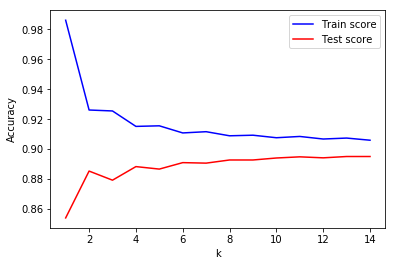

In [26]:
train_score = []
test_score = []

n = range(1,15)
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

plt.plot(n,train_score,'b',label='Train score')
plt.plot(n,test_score,'r',label = 'Test score')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

K=11 is the best parameter. 

In [27]:
knn = KNeighborsClassifier(11)
knn.fit(x_train, y_train)
print('Train score: {:.4f}'.format(knn.score(x_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(x_test, y_test)))

Train score: 0.9085
Test score: 0.8948


In [28]:
#Forming Confusion Matrix
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[7727  253]
 [ 698  365]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.59      0.34      0.43      1063

   micro avg       0.89      0.89      0.89      9043
   macro avg       0.75      0.66      0.69      9043
weighted avg       0.88      0.89      0.88      9043



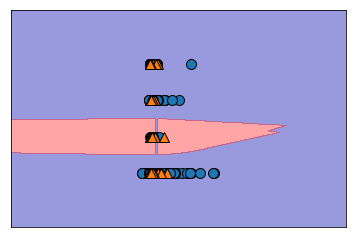

In [29]:
x_b = x_train[0:774,[2,5]]
y_b = y_train[0:774]

knn = KNeighborsClassifier(11)
knn.fit(x_b, y_b)

mglearn.plots.plot_2d_separator(knn, x_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(x_b[:, 0], x_b[:, 1], y_b)

## 3. Kernelized SVM Classification 

## a. Linear Kernel

In [30]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

In [31]:
C1 = [0.01,0.1,1,10]

for i in C1:
    svc = SVC(C=i,kernel='linear')
    svc.fit(x_train,y_train)
    print('C:{}'.format(i))
    print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(x_train,y_train),svc.score(x_test,y_test)))

C:0.01
Train score: 0.8832,Test score: 0.8825
C:0.1
Train score: 0.8832,Test score: 0.8825
C:1
Train score: 0.8832,Test score: 0.8825
C:10
Train score: 0.8832,Test score: 0.8825


Best parameter is C=1

For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. So, we choose C=1 in this case.

In [32]:
svc = SVC(C=1,kernel='linear')
svc.fit(x_train,y_train)

#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
pred = svc.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[7980    0]
 [1063    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7980
           1       0.00      0.00      0.00      1063

   micro avg       0.88      0.88      0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.78      0.88      0.83      9043



C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## b. RBF Kernel

In [33]:
C1 = [0.01,0.1,1,10]
gamma1 = [0.01,0.1,1,10]

for i in C1:
    for j in gamma1:
        svc = SVC(C=i,kernel='rbf',gamma=j)
        svc.fit(x_train,y_train)
        print('C:{},gamma:{}'.format(i,j))
        print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(x_train,y_train),svc.score(x_test,y_test)))

C:0.01,gamma:0.01
Train score: 0.8832,Test score: 0.8825
C:0.01,gamma:0.1
Train score: 0.8832,Test score: 0.8825
C:0.01,gamma:1
Train score: 0.8832,Test score: 0.8825
C:0.01,gamma:10
Train score: 0.8926,Test score: 0.8902
C:0.1,gamma:0.01
Train score: 0.8832,Test score: 0.8825
C:0.1,gamma:0.1
Train score: 0.8832,Test score: 0.8825
C:0.1,gamma:1
Train score: 0.8832,Test score: 0.8825
C:0.1,gamma:10
Train score: 0.8945,Test score: 0.8904
C:1,gamma:0.01
Train score: 0.8832,Test score: 0.8825
C:1,gamma:0.1
Train score: 0.8832,Test score: 0.8825
C:1,gamma:1
Train score: 0.8932,Test score: 0.8906
C:1,gamma:10
Train score: 0.8967,Test score: 0.8911
C:10,gamma:0.01
Train score: 0.8832,Test score: 0.8825
C:10,gamma:0.1
Train score: 0.8832,Test score: 0.8825
C:10,gamma:1
Train score: 0.8944,Test score: 0.8913
C:10,gamma:10
Train score: 0.9001,Test score: 0.8934


c= 10, gamma= 10 are the best parameters. 

In [34]:
svc = SVC(C=10,kernel='rbf',gamma=10)
svc.fit(x_train,y_train)
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
pred = svc.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[7813  167]
 [ 797  266]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7980
           1       0.61      0.25      0.36      1063

   micro avg       0.89      0.89      0.89      9043
   macro avg       0.76      0.61      0.65      9043
weighted avg       0.87      0.89      0.87      9043



## c. Polynomial Kernel

In [36]:
C1 = [0.01,0.1,1,10]
gamma1 = [0.01,0.1,1]

for i in C1:
    for j in gamma1:
        svc = SVC(C=i,kernel='poly',gamma=j)
        svc.fit(x_train,y_train)
        print('C:{},gamma:{}'.format(i,j))
        print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(x_train,y_train),svc.score(x_test,y_test)))

C:0.01,gamma:0.01
Train score: 0.8832,Test score: 0.8825
C:0.01,gamma:0.1
Train score: 0.8832,Test score: 0.8825
C:0.01,gamma:1
Train score: 0.8832,Test score: 0.8825
C:0.1,gamma:0.01
Train score: 0.8832,Test score: 0.8825
C:0.1,gamma:0.1
Train score: 0.8832,Test score: 0.8825
C:0.1,gamma:1
Train score: 0.8832,Test score: 0.8825
C:1,gamma:0.01
Train score: 0.8832,Test score: 0.8825
C:1,gamma:0.1
Train score: 0.8832,Test score: 0.8825
C:1,gamma:1
Train score: 0.8832,Test score: 0.8827
C:10,gamma:0.01
Train score: 0.8832,Test score: 0.8825
C:10,gamma:0.1
Train score: 0.8832,Test score: 0.8825
C:10,gamma:1
Train score: 0.8835,Test score: 0.8830


c=10 gamma=1 are the best parameters

In [37]:
svc = SVC(C=10, kernel='poly', gamma=1)
svc.fit(x_train,y_train)
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
pred = svc.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[7975    5]
 [1053   10]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7980
           1       0.67      0.01      0.02      1063

   micro avg       0.88      0.88      0.88      9043
   macro avg       0.78      0.50      0.48      9043
weighted avg       0.86      0.88      0.83      9043



## 4. Linear SVM Classification


In [38]:
from sklearn.model_selection import train_test_split
x = data.drop('y',axis=1)
y = data['y']

x_train_org, x_test_org, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train_org)
x_test = scale.transform(x_test_org)

C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


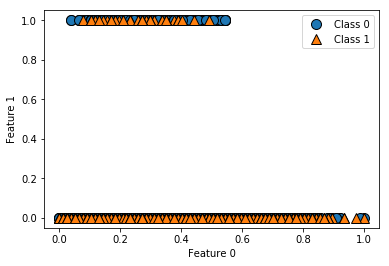

In [39]:
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1'])

In [40]:
from sklearn.svm import LinearSVC
#for i in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
linear_svm = LinearSVC(C=100)
linear_svm.fit(x_train,y_train)
print('Train score: {:.4f}'.format(linear_svm.score(x_train,y_train)))
print('Test score: {:.4f}'.format(linear_svm.score(x_test,y_test)))

Train score: 0.8877
Test score: 0.8859


C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [41]:
#Forming Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
pred = linear_svm.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[7896   84]
 [ 948  115]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7980
           1       0.58      0.11      0.18      1063

   micro avg       0.89      0.89      0.89      9043
   macro avg       0.74      0.55      0.56      9043
weighted avg       0.86      0.89      0.85      9043



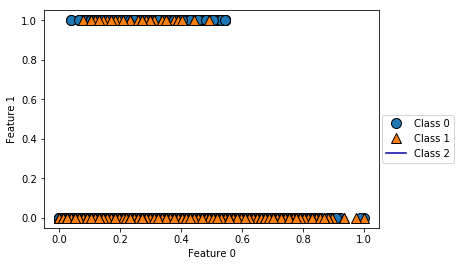

In [42]:
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
line = np.linspace(-5, 5)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1','Class 2','Class 3','Class 4','Class 5'], loc=(1.01, 0.3))

## 5. Decision Tree Classification


In [43]:
from sklearn.tree import DecisionTreeClassifier

x= data.drop('y',axis=1)
y=data['y']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.992
Accuracy on test set: 0.850


In [44]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.903
Accuracy on test set: 0.897


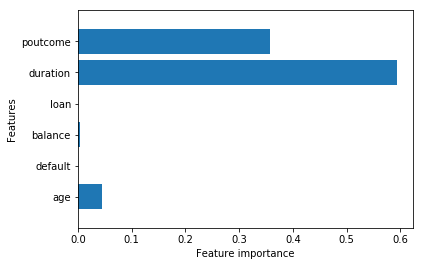

<Figure size 720x720 with 0 Axes>

In [45]:
def plot_feature_importances_risk(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(x.columns))
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    plt.figure(figsize=(10,10))
plot_feature_importances_risk(dtree)

In [46]:
#Forming Confusion Matrix
pred = dtree.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[7749  231]
 [ 696  367]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.61      0.35      0.44      1063

   micro avg       0.90      0.90      0.90      9043
   macro avg       0.77      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



## Out of all the classification models, Decision Tree gives the best prediction for variable y.